In [3]:
# Importar las librerías necesarias
import numpy as np
np.random.seed(4) # establece la semilla para el generador de números aleatorios de NumPy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # normalizar datos numéricos entre un rango específico

In [4]:
# Lee el conjunto de datos de series de tiempo a partir de un archivo CSV y lo almacena en un DataFrame de Pandas llamado dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')

In [5]:
# Separar los datos de entrenamiento y validación
set_entrenamiento1= (dataset["Ghi"].iloc[0:4000])  # Toma los primeros 4000 puntos de datos de la columna Ghi y los almacena en una variable llamada set_entrenamiento1
set_validacion1 = dataset["Ghi"].iloc[4000:6240]  # Toma los siguientes 2240 puntos de datos de la columna Ghi y los almacena en una variable llamada set_validacion1

In [6]:
# Escalar los datos de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))  # Crea un objeto MinMaxScaler con un rango de características de 0 a 1
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)  # Crea un arreglo numpy de una dimensión a partir de set_entrenamiento1 y lo reorganiza en una matriz de una columna
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)  # Escala los valores de set_entrenamiento entre 0 y 1 y los almacena en set_entrenamiento_escalado

In [7]:
# Establecer el tamaño del paso temporal
time_step = 60  # Define la longitud de la secuencia de tiempo utilizada para predecir el siguiente valor

# Crear los datos de entrenamiento y sus etiquetas correspondientes
X_train = []  # Crea una lista vacía para almacenar los valores de entrada de entrenamiento
Y_train = []  # Crea una lista vacía para almacenar los valores de salida de entrenamiento
m = len(set_entrenamiento_escalado)  # Obtiene la longitud de set_entrenamiento_escalado

for i in range(time_step,m):  # Itera sobre la secuencia de tiempo
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])  # Agrega una sección de "time_step" valores de set_entrenamiento_escalado a X_train

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])  # Agrega el siguiente valor a Y_train
X_train, Y_train = np.array(X_train), np.array(Y_train)  # Convierte X_train y Y_train a arreglos numpy

# Darle forma a los datos de entrenamiento para que sean compatibles con el modelo de red neuronal
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [8]:
# Importar las librerías necesarias para construir el modelo de red neuronal
from keras.models import Sequential
from keras.layers import GRU, Dense

In [9]:
# Definir las dimensiones de entrada y salida del modelo
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

# Crear el modelo de red neuronal
modelo = Sequential()
modelo.add(GRU(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))

# Compilar el modelo
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

# Entrenar el modelo
history=modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
124/124 - 3s - loss: 0.0106 - 3s/epoch - 23ms/step
Epoch 2/20
124/124 - 1s - loss: 0.0019 - 1s/epoch - 11ms/step
Epoch 3/20
124/124 - 1s - loss: 0.0015 - 1s/epoch - 11ms/step
Epoch 4/20
124/124 - 1s - loss: 0.0012 - 1s/epoch - 11ms/step
Epoch 5/20
124/124 - 1s - loss: 9.9859e-04 - 1s/epoch - 11ms/step
Epoch 6/20
124/124 - 1s - loss: 8.8278e-04 - 1s/epoch - 11ms/step
Epoch 7/20
124/124 - 1s - loss: 7.7431e-04 - 1s/epoch - 11ms/step
Epoch 8/20
124/124 - 1s - loss: 7.2443e-04 - 1s/epoch - 11ms/step
Epoch 9/20
124/124 - 1s - loss: 6.2554e-04 - 1s/epoch - 11ms/step
Epoch 10/20
124/124 - 1s - loss: 5.6632e-04 - 1s/epoch - 11ms/step
Epoch 11/20
124/124 - 1s - loss: 5.9686e-04 - 1s/epoch - 11ms/step
Epoch 12/20
124/124 - 1s - loss: 5.0002e-04 - 1s/epoch - 11ms/step
Epoch 13/20
124/124 - 1s - loss: 4.7086e-04 - 1s/epoch - 11ms/step
Epoch 14/20
124/124 - 1s - loss: 4.3201e-04 - 1s/epoch - 11ms/step
Epoch 15/20
124/124 - 1s - loss: 4.2460e-04 - 1s/epoch - 11ms/step
Epoch 16/20
124/124 

In [10]:
# Obtener el historial de entrenamiento
history_dict = history.history
print(history_dict.keys())

# Escalar los datos de validación
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

# Crear los datos de prueba para hacer predicciones
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)

# Hacer predicciones con el modelo entrenado
prediccion = modelo.predict(x_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)

dict_keys(['loss'])
70/70 [==============================] - 0s 694us/step


In [11]:
prediccion2

,0
0,481.084167
1,452.748901
2,415.936493
3,374.422729
4,328.293854
...,...
2235,538.037476
2236,504.563324
2237,521.904541
2238,585.359192


In [12]:
xaxis=np.arange(start=0,stop=43500,step=5) # Crear un eje x para graficar las predicciones

# Leer los datos originales del archivo CSV
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd

# Carga los datos desde la dirección URL especificada
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)

datos_train=df["Ghi"].iloc[0:4000] # Obtiene los primeros 4000 datos de "Ghi" para usarlos como datos de entrenamiento

datos_val=df["Ghi"].iloc[4001:6240] # Obtiene los datos restantes de "Ghi" a partir del índice 4001 para usarlos como datos de validación

datos_val # Imprime los datos de validación

4001    342
4002    312
4003    278
4004    240
4005    200
       ... 
6235    411
6236    384
6237    398
6238    449
6239    524
Name: Ghi, Length: 2239, dtype: int64

In [13]:
from numpy.matrixlib.defmatrix import concatenate # Importa la función "concatenate" de la librería numpy

j=np.zeros(4000,int) # Crea un array de ceros de tamaño 4000 y tipo int
pred44=pd.DataFrame(j) # Crea un DataFrame con los valores del array de ceros
pred56=np.asarray(prediccion2,dtype=np.float64) # Convierte la variable "prediccion2" a un array de tipo float64 y lo asigna a la variable "pred56"

pred56=pred56.reshape(-1,1) # Cambia la forma de "pred56" a una matriz de una sola columna
pred57=j.reshape(-1,1) # Cambia la forma de "j" a una matriz de una sola columna
pred57=j.reshape(-1,1) #Cambia la forma de "j" a una matriz de una sola columna

lim=np.concatenate((pred57,pred56)) #Concatena "pred57" y "pred56" en una nueva matriz "lim"
lim2=pd.DataFrame(lim) #Crea un DataFrame con los valores de "lim"
prediccion_final=lim2[4000:] #Obtiene los datos de "prediccion_final" a partir del índice 4000 de "lim2"

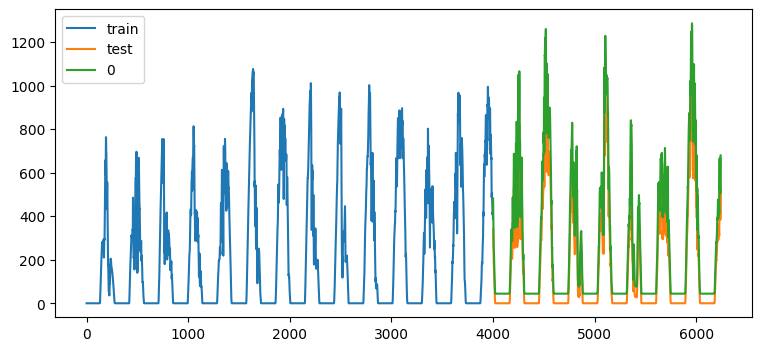

In [14]:
fig, ax = plt.subplots(figsize=(9, 4)) #Crea una figura y un objeto de eje de figura con tamaño 9x4 pulgadas

datos_train.plot(ax=ax, label='train') #Grafica los datos de entrenamiento en el objeto de eje de figura "ax" con etiqueta "train"
datos_val.plot(ax=ax, label='test') #Grafica los datos de validación en el objeto de eje de figura "ax" con etiqueta "test"
prediccion_final.plot(ax=ax,label="predict") #Grafica los datos de predicción final en el objeto de eje de figura "ax" con etiqueta "predict"

ax.legend(); #Agrega la leyenda a la figura

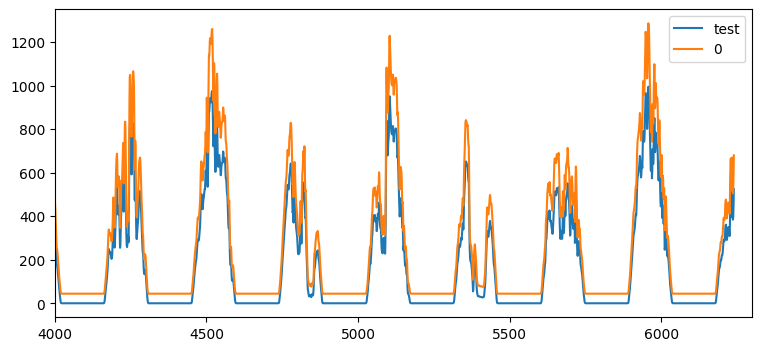

In [15]:
fig, ax = plt.subplots(figsize=(9, 4)) #Crea una figura y un objeto de eje de figura con tamaño 9x4 pulgadas
datos_val.plot(ax=ax, label='test') #Grafica los datos de validación en el objeto de eje de figura "ax" con etiqueta "test"
lim2.plot(ax=ax, label='predict') #Grafica los datos de predicción final en el objeto de eje de figura "ax" con etiqueta "predict"

plt.xlim(4000,6300) #Establece el rango de valores en el eje x de la figura

ax.legend(); #Agrega la leyenda a la figura